In [1]:
import pandas as pd
import os 
import numpy as np

#path cor csv file
PATH_CSV = "/home/andrei/Desktop/SI/Proiect"

In [2]:
#function for read data, drop first 4
def load_data(data_path = PATH_CSV):
    csv_path = data_path + "/MergeConflictsDataset.csv"
    csvData = pd.read_csv(csv_path)
    csvData.drop(csvData.columns[0:4],axis=1, inplace=True)
    return csvData

In [3]:
csvData = load_data()
csvData.head()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,1,5,0,0,1,23,0,0,0,0,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,0,1166,11267,1,2,371,3,7,199,2,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,1,0,0,0,1,22,0,0,0,0,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1,0,0,2,1,24,1,0,0,0,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,0,0,0,1,2,2,1,0,0,0,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [4]:
csvData.columns

Index(['is pr', 'added lines', 'deleted lines', 'devs parent1', 'devs parent2',
       'time', 'nr files', 'added files', 'deleted files', 'renamed files',
       'copied files', 'modified files', 'nr commits1', 'nr commits2',
       'density1', 'density2', 'fix', 'bug', 'feature', 'improve', 'document',
       'refactor', 'update', 'add', 'remove', 'use', 'delete', 'change',
       'messages_min', 'messages_max', 'messages_mean', 'messages_median',
       'conflict'],
      dtype='object')

In [5]:
csvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26988 entries, 0 to 26987
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is pr            26988 non-null  int64  
 1   added lines      26988 non-null  int64  
 2   deleted lines    26988 non-null  int64  
 3   devs parent1     26988 non-null  int64  
 4   devs parent2     26988 non-null  int64  
 5   time             26988 non-null  int64  
 6   nr files         26988 non-null  int64  
 7   added files      26988 non-null  int64  
 8   deleted files    26988 non-null  int64  
 9   renamed files    26988 non-null  int64  
 10  copied files     26988 non-null  int64  
 11  modified files   26988 non-null  int64  
 12  nr commits1      26988 non-null  int64  
 13  nr commits2      26988 non-null  int64  
 14  density1         26988 non-null  int64  
 15  density2         26988 non-null  int64  
 16  fix              26988 non-null  int64  
 17  bug         

In [6]:
#print set data first is rows last one are columns
csvData.shape

(26988, 33)

In [7]:
#display dispersion of a dataset's distribution
csvData.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26988.000000,2.698800e+04,2.698800e+04,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,...,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000
mean,0.777827,4.253755e+02,2.502937e+02,4.654254,1.911368,240.794501,0.751704,2.430006,1.395768,0.969690,...,4.314177,0.954980,1.338187,0.096228,1.007411,51.388024,104.634023,69.444945,68.011653,0.054432
std,0.415714,8.885240e+03,1.027630e+04,12.227462,6.532536,908.246361,10.617551,67.821839,90.589096,64.227302,...,12.921030,3.202485,4.268581,0.541770,6.031895,34.555932,89.457205,40.054486,39.381905,0.226872
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.333333,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.689744,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


In [8]:
#display dispersion of a dataset's distribution
csvData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is pr,26988.0,0.777827,0.415714,0.0,1.0,1.000000,1.000000,1.0
added lines,26988.0,425.375537,8885.239856,0.0,2.0,11.000000,75.000000,1140945.0
deleted lines,26988.0,250.293686,10276.303244,0.0,1.0,2.000000,15.000000,1140456.0
devs parent1,26988.0,4.654254,12.227462,0.0,0.0,1.000000,3.000000,158.0
devs parent2,26988.0,1.911368,6.532536,0.0,1.0,1.000000,1.000000,182.0
time,26988.0,240.794501,908.246361,0.0,9.0,36.000000,139.000000,21513.0
nr files,26988.0,0.751704,10.617551,0.0,0.0,0.000000,0.000000,1152.0
added files,26988.0,2.430006,67.821839,0.0,0.0,0.000000,0.000000,10404.0
deleted files,26988.0,1.395768,90.589096,0.0,0.0,0.000000,0.000000,10396.0
renamed files,26988.0,0.969690,64.227302,0.0,0.0,0.000000,0.000000,10398.0


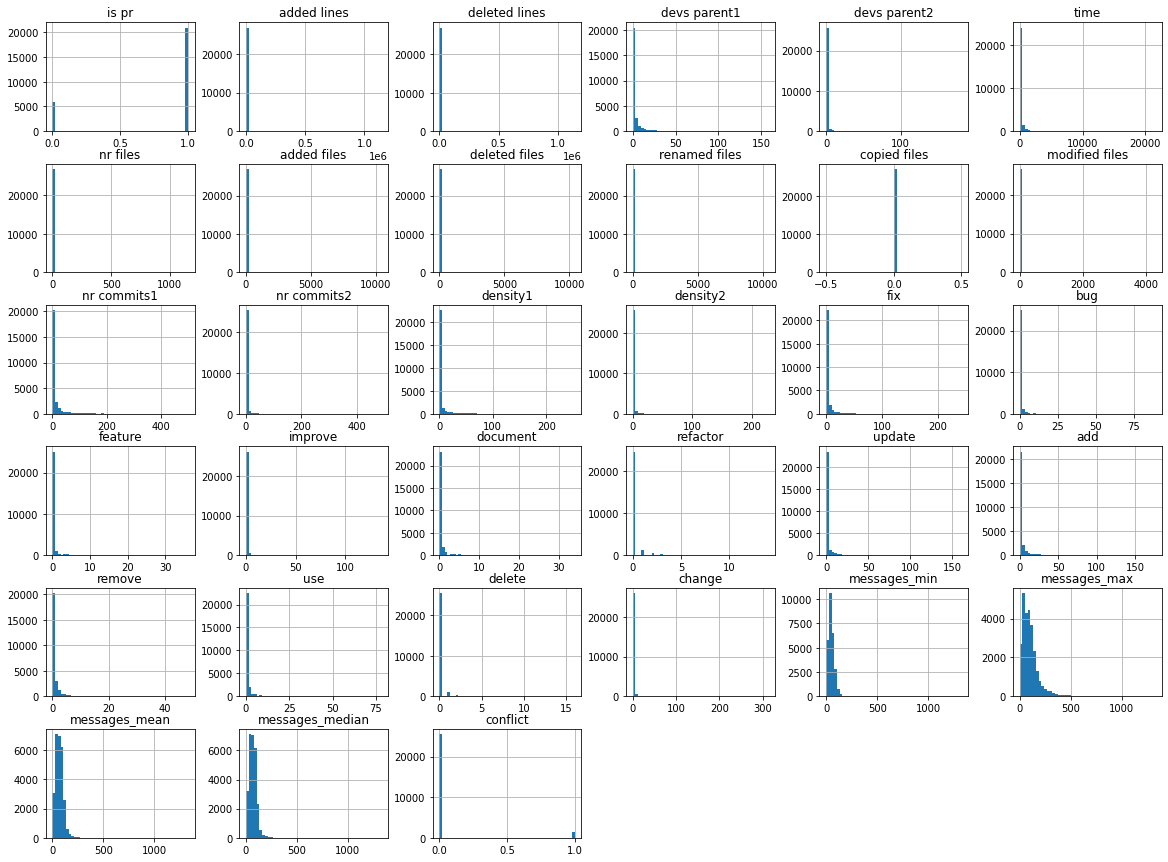

In [9]:
import matplotlib.pyplot as plt
csvData.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
corelatedData=csvData.corr()
print(corelatedData)

                    is pr  added lines  deleted lines  devs parent1  \
is pr            1.000000    -0.031623      -0.022815     -0.044585   
added lines     -0.031623     1.000000       0.072799     -0.011097   
deleted lines   -0.022815     0.072799       1.000000     -0.006633   
devs parent1    -0.044585    -0.011097      -0.006633      1.000000   
devs parent2    -0.203300     0.153787       0.042103     -0.017708   
time            -0.064534     0.055161       0.012469      0.364631   
nr files        -0.087467     0.011672       0.011947      0.069328   
added files     -0.018829     0.856242       0.035387     -0.008747   
deleted files   -0.011977     0.020675       0.975748     -0.004704   
renamed files   -0.018464     0.022322       0.010209     -0.003892   
copied files          NaN          NaN            NaN           NaN   
modified files  -0.097172     0.229387       0.096770     -0.023194   
nr commits1     -0.097663    -0.007064      -0.003523      0.873122   
nr com

<AxesSubplot:>

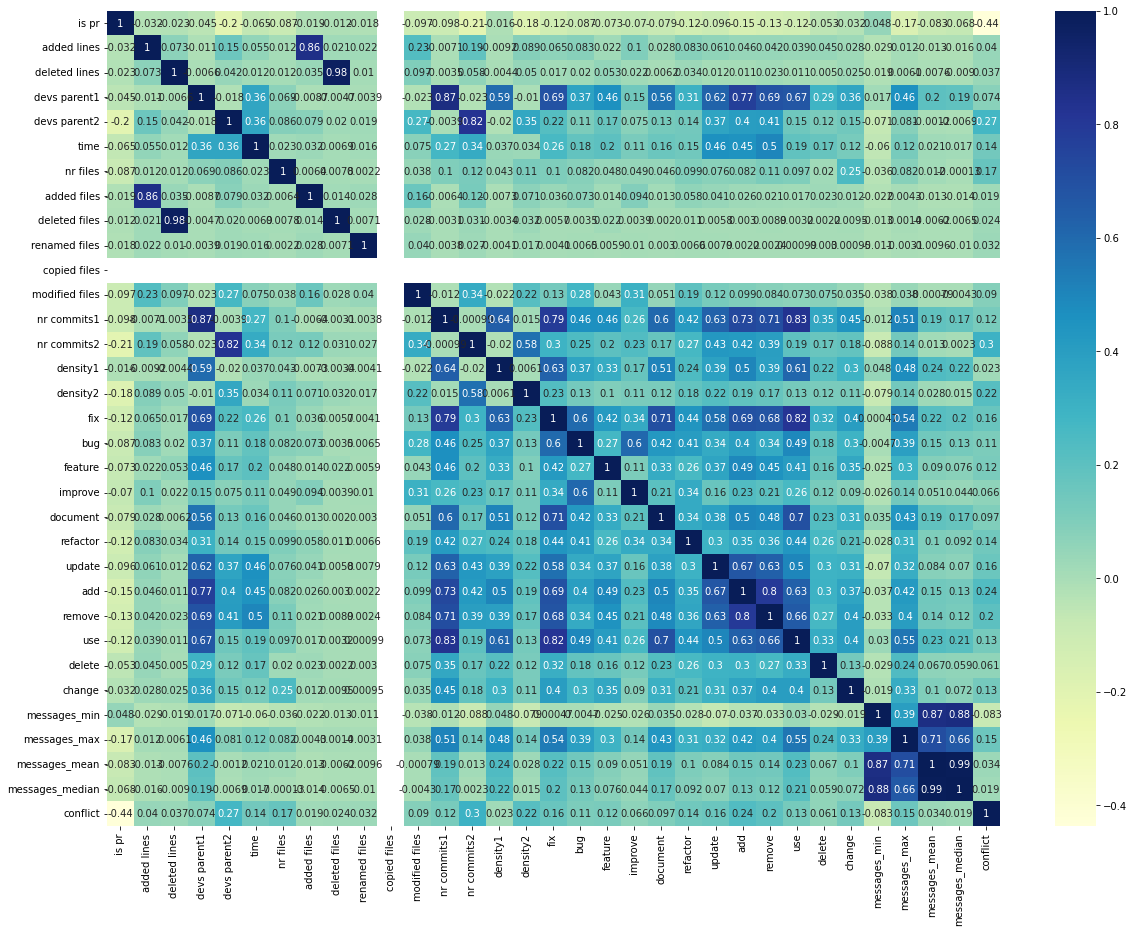

In [11]:
import seaborn as sbn 
#for visualization
#create a plot data as a color-encoded matrix
plt.figure(figsize=(20,15))
sbn.heatmap(corelatedData, annot = True, cmap = "YlGnBu")

In [12]:
X,Y = csvData.iloc[:,:-1].values,csvData.iloc[:,-1].values
print(X.shape,Y.shape)

(26988, 32) (26988,)


In [13]:
from sklearn.model_selection import train_test_split
#split into train test sets for real 
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.201, random_state=42)
print('Training and Testing data shape:')
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Training and Testing data shape:
(21563, 32) (5425, 32) (21563,) (5425,)


In [14]:
print("X Train data:\n")
print(X_train)
print("\n\n")
print("X Test data:\n")
print(X_test)

X Train data:

[[  0.          10.           9.         ...  72.          59.33333333
   56.        ]
 [  1.           1.           1.         ...  26.          26.
   26.        ]
 [  1.           1.           1.         ...  94.          90.75
   91.        ]
 ...
 [  1.          15.          15.         ...  69.          46.8
   43.        ]
 [  0.          48.           0.         ...  93.          93.
   93.        ]
 [  1.           3.           3.         ... 163.          97.89285714
   97.        ]]



X Test data:

[[1.00000000e+00 8.00000000e+01 0.00000000e+00 ... 1.06000000e+02
  6.40000000e+01 5.75000000e+01]
 [0.00000000e+00 6.00000000e+00 2.00000000e+00 ... 3.90000000e+01
  3.90000000e+01 3.90000000e+01]
 [1.00000000e+00 4.21000000e+02 1.00000000e+00 ... 5.80000000e+01
  5.80000000e+01 5.80000000e+01]
 ...
 [1.00000000e+00 2.50000000e+01 1.00000000e+01 ... 1.45000000e+02
  1.16545455e+02 1.17000000e+02]
 [0.00000000e+00 1.99190000e+04 7.54400000e+03 ... 1.93000000e+02
  

In [15]:
print("Y Train data:\n")
print(Y_train)
print("\n\n")
print("Y Test data:\n")
print(Y_test)

Y Train data:

[1 0 0 ... 0 0 0]



Y Test data:

[0 0 0 ... 0 1 0]


In [16]:
#Scalarea datelor
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print("X Train data:\n")
print(X_train)
print("\n\n")
print("X Test data:\n")
print(X_test)

X Train data:

[[-1.87002033 -0.04363945 -0.02310537 ... -0.36177147 -0.25316419
  -0.30729365]
 [ 0.53475355 -0.04457201 -0.02380685 ... -0.87715868 -1.10453645
  -1.08657143]
 [ 0.53475355 -0.04457201 -0.02380685 ... -0.11528194  0.54925418
   0.60186376]
 ...
 [ 0.53475355 -0.04312136 -0.02257926 ... -0.39538368 -0.57328016
  -0.64498069]
 [-1.87002033 -0.03970196 -0.02389453 ... -0.12648601  0.6067218
   0.65381561]
 [ 0.53475355 -0.04436478 -0.02363148 ...  0.65779886  0.73169109
   0.75771931]]



X Test data:

[[ 5.34753546e-01 -3.63861799e-02 -2.38945300e-02 ...  1.91668933e-02
  -1.33972069e-01 -2.68329761e-01]
 [-1.87002033e+00 -4.40539231e-02 -2.37191605e-02 ... -7.31505772e-01
  -7.72501270e-01 -7.48884390e-01]
 [ 5.34753546e-01 -1.05239003e-03 -2.38068452e-02 ... -5.18628449e-01
  -2.87219077e-01 -2.55341798e-01]
 ...
 [ 5.34753546e-01 -4.20851782e-02 -2.30176823e-02 ...  4.56125609e-01
   1.20810022e+00  1.27723783e+00]
 [-1.87002033e+00  2.01929434e+00  6.37599407e-01 ..

In [18]:
np.random.seed(42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=8, min_samples_leaf = 5, min_samples_split = 2, splitter = 'best')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5)

[Text(0.567246835443038, 0.9444444444444444, 'X[6] <= 0.07\ngini = 0.104\nsamples = 21563\nvalue = [20379, 1184]'),
 Text(0.27927215189873417, 0.8333333333333334, 'X[6] <= -0.024\ngini = 0.047\nsamples = 20268\nvalue = [19775, 493]'),
 Text(0.13871308016877637, 0.7222222222222222, 'X[1] <= -0.045\ngini = 0.003\nsamples = 17038\nvalue = [17013, 25]'),
 Text(0.07383966244725738, 0.6111111111111112, 'X[0] <= -0.668\ngini = 0.042\nsamples = 737\nvalue = [721, 16]'),
 Text(0.046413502109704644, 0.5, 'X[28] <= -1.036\ngini = 0.18\nsamples = 150\nvalue = [135, 15]'),
 Text(0.02531645569620253, 0.3888888888888889, 'X[30] <= -0.472\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.016877637130801686, 0.2777777777777778, 'X[30] <= -0.587\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.008438818565400843, 0.16666666666666666, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.02531645569620253, 0.16666666666666666, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.033755274261603

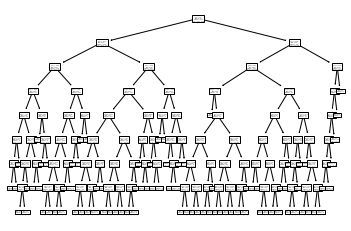

In [20]:
from sklearn import tree
tree.plot_tree(clf)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error
mae = mean_absolute_error(Y_test,y_pred)
print('Eroare: ' , mae,'\n')
print(classification_report(Y_test, y_pred),"\n")
score = accuracy_score(Y_test, y_pred)
print('Acuratete: ', score)

Eroare:  0.037603686635944704 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5140
           1       0.64      0.65      0.65       285

    accuracy                           0.96      5425
   macro avg       0.81      0.82      0.81      5425
weighted avg       0.96      0.96      0.96      5425
 

Acuratete:  0.9623963133640553


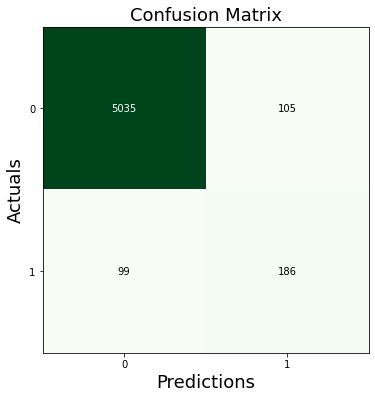

In [23]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()